##**Context**
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

USE train.csv and test.csv

1. data with outputs/labels (Train/Test)
    1. Train
    2. Test / Validation set
2. data with just the X (or Test Set)

##Load and Read Both files:

train_data ('train_1.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_data = pd.read_csv('train_1.csv')
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


test_data ('test.csv')

In [ ]:
test_data = pd.read_csv('test.csv')
test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


##Clean

Check for missing values

In [ ]:
# Check for missing values
print(train_data.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [ ]:
print(test_data.isnull().sum())

id       0
tweet    0
dtype: int64


Check duplicates

In [ ]:
# Check for duplicate rows
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())


0
0


Outliers of very short or extremely long tweets?

In [ ]:
# Example: Remove tweets that are too short or too long
train_data = train_data[train_data['tweet'].apply(lambda x: 10 <= len(x) <= 280)]
test_data = test_data[test_data['tweet'].apply(lambda x: 10 <= len(x) <= 280)]


Special characters

In [ ]:
# Cleaning special characters in the 'tweet' column
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+|[^a-zA-Z\s]', '', text)  # Remove URLs, @mentions, and non-alphabetic characters
    return text

# Apply cleaning function to both training & test data; .loc ensures working w/original datafrane and not a copy of it
train_data.loc[:, 'tweet'] = train_data['tweet'].apply(clean_text)
test_data.loc[:, 'tweet'] = test_data['tweet'].apply(clean_text)



Verify Data Types

In [ ]:
# Check data types in train_data
print(train_data.dtypes)

# Check data types in test_data
print(test_data.dtypes)

id        int64
label     int64
tweet    object
dtype: object
id        int64
tweet    object
dtype: object


## Preprocess

train_data Drop the id column, separate features/labels, split data

In [ ]:
# Drop id column from train_data
train_data = train_data.drop(columns=['id'])

# Separate features and labels
X = train_data['tweet']
y = train_data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


##Vectorize the text data

In [ ]:
# Convert text data to a document-term matrix using CountVectorizer
# Uses training data to build the vocabulary, determining which words are marked as 1 (present) or 0 (absent).
# Then applies this same vocabulary to test  to ensure consistency in how words are represented.
vectorizer = CountVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
# Transform test using same vocabulary
X_test_vectorized = vectorizer.transform(X_test)

##Train Model

In [ ]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the RandomForest Classifier Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

##Evaluate model

In [ ]:
# Define models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vectorized)

    # Evaluate the model
    print(f"\n{name} Model Evaluation:")
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))



Naive Bayes Model Evaluation:
Accuracy: 0.9558253034663997
Confusion Matrix:
[[7400   32]
 [ 321  238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7432
           1       0.88      0.43      0.57       559

    accuracy                           0.96      7991
   macro avg       0.92      0.71      0.78      7991
weighted avg       0.95      0.96      0.95      7991


Logistic Regression Model Evaluation:
Accuracy: 0.9600800901013641
Confusion Matrix:
[[7383   49]
 [ 270  289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7432
           1       0.86      0.52      0.64       559

    accuracy                           0.96      7991
   macro avg       0.91      0.76      0.81      7991
weighted avg       0.96      0.96      0.96      7991


Random Forest Model Evaluation:
Accuracy: 0.9602052308847453
Confusion Matrix:
[[

*Accuracy:*
- All models have similar accuracy ~ 96%.

*Precision:*
- Random Forest performs best for 1(hate speech) at 91%.
- All models are similar, ~96%, for 0(no hate speech).

*Recall:*
- Logistic Regression has the highest for 0(no hate speech) at 99%.
- Random Forest has lower recall (48%) compared to Logistic Regression (52%) for 1(hate speech) meaning it misses more class 1 instances.

*F1-Score:*

- Logistic Regression has the highest for 0(no hate speech) at 98% and performs better for 1(hate speech at 64%.

Conclusion:

Logistic Regression appears to be the best model for this classification task based on overall performance; notably the F1-Score that balances precision and recall.  It is better in identifying 1(hate speech) instances.



##Confusion Matrix

Confusion Matrix:
 [[7383, 49], [270, 289]]


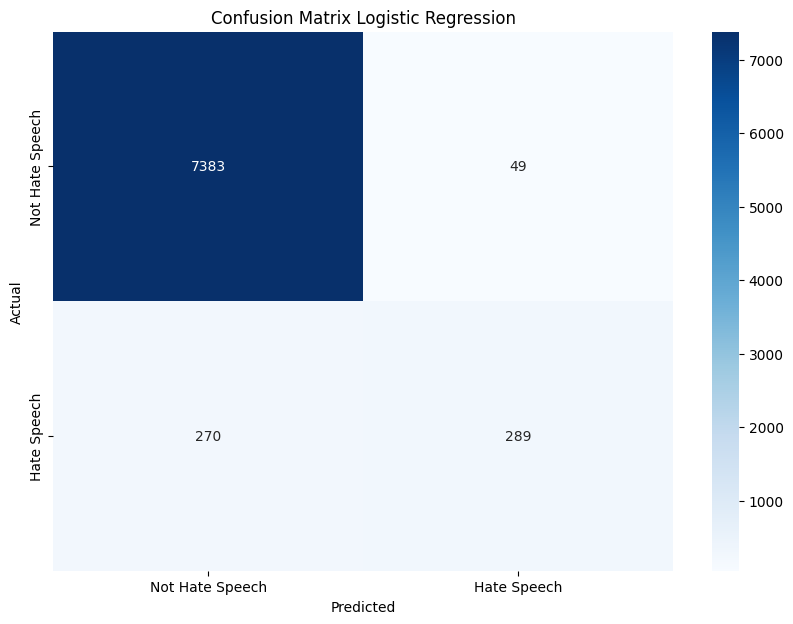

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = conf_matrix = [[7383, 49], [270, 289]]

# Print confusion matrix to verify
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hate Speech', 'Hate Speech'],
            yticklabels=['Not Hate Speech', 'Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

Confusion matrix

True Negatives (TN): 7383 The model correctly predicted 0 for these instances<br>
False Positives (FP): 49 The model incorrectly predicted 1 when it should have been 0<br>
False Negatives (FN): 270 The model incorrectly predicted 0 when it should have been 1<br>
True Positives (TP): 289 The model correctly predicted 1 for these instances

##Predict on test set

In [ ]:
# Predicting on the test set
X_test_final = test_data['tweet']
X_test_final_vectorized = vectorizer.transform(X_test_final)
predictions = model.predict(X_test_final_vectorized)

# Add predictions to the test data frame using .copy() to avoid SettingWithCopyWarning
test_data = test_data.copy()
test_data['label'] = predictions

test_data


,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,white supremacists want everyone to see the ...,0
2,31965,safe ways to heal your acne altwaystoheal h...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,rd bihday to my amazing hilarious nephew eli...,0
...,...,...,...
17192,49155,thought factory leftright polarisation trump u...,1
17193,49156,feeling like a mermaid hairflip neverready fo...,0
17194,49157,hillary campaigned today in ohioomg amp used w...,0
17195,49158,happy at work conference right mindset leads t...,0


In [ ]:
# Save the predictions
test_data.to_csv('test_predictions.csv', index=False)

##Summary

We evaluated and compared three different classification models: Naive Bayes, Logistic Regression, and Random Forest to classify tweets into hate speech and non-hate speech categories.

Logistic Regression is recommended as the best model for this classification task. It provides a good balance between precision and recall for hate speech classification, as reflected in its better F1-Score. Although Random Forest has higher precision, it lacks in recall compared to Logistic Regression. The Logistic Regression model's ability to balance between correctly identifying hate speech and minimizing false positives makes it the most suitable choice for this application.
